### Objective

1.Explore the dataset and extract insights using Exploratory Data Analysis.

2.Hypothesis Testing

3.Leveraging customer information is of paramount importance for most businesses.


### Data 

1.Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 
years, since they are generally covered by the government).

2.Sex - This is the policy holder's gender, either male or female.

3.BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person
is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) 
squared. An ideal BMI is within the range of 18.5 to 24.9.

4.Children - This is an integer indicating the number of children / dependents covered by the
insurance plan.

5.Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.

6.Region - This is the beneficiary's place of residence in the U.S., divided into four geographic 
regions - northeast, southeast, southwest, or northwest.

7.Charges - Individual medical costs billed to health insurance

### Import the necessary libraries :

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import warnings
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 600)
warnings.filterwarnings("ignore")

### Read in the dataset

In [2]:
data = pd.read_csv("AxisInsurance.csv")

### View the first few rows of the dataset

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Check the shape of the dataset

In [4]:
data.shape

(1338, 7)

In [5]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')


Shape of the data: (1338, 7)
There are 1338 rows in the data.


### Check the dataframe info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


### Check the data types 

In [7]:
#What are there different abouth unique datatypes in the present data?
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

### Check the data Columns

In [8]:
# what are different in individual dtype columns:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# Grouping  dtypes and transform the index object in to the series :
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

### Create a dictionary containing various datatypes and the columns

In [10]:
# Create various dtypesa dictionary (object, Float, and integer) and the columns which have the datatype:
dt = {k.name: v for k, v in g.items()}
# Arrange the columns by different kind datatypes:
attributes_by_datatype = pd.DataFrame(list(dt.values()), index = dt.keys(), columns = ['Attr 1', 'Attr 2', 'Attr 3'])
attributes_by_datatype

,Attr 1,Attr 2,Attr 3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


### Check for missing values

In [11]:
#Arrange column as the null values wise
data.apply(lambda x:sum(x.isnull()))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

From the data show above there aren't null values

### Give a statistical summary for the dataset


In [12]:
data.describe(include='all')


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# EDA

## Numerical Variable

### Observations on Age:

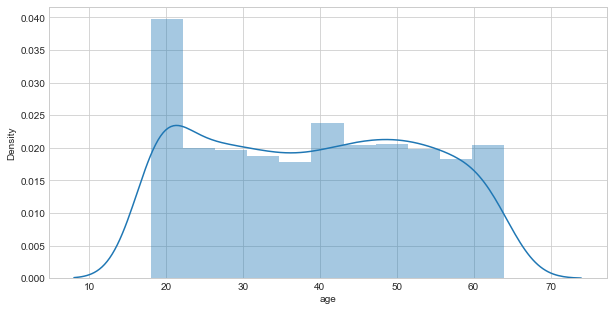

In [13]:

plt.figure(figsize=(10,5))
sns.distplot(data['age'])
plt.show();

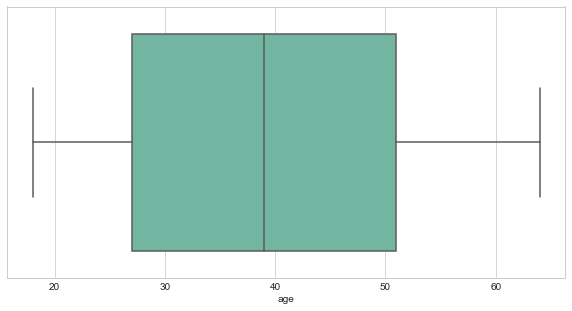

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='age',palette="Set2",data=data)
plt.show();

The graphic shows age column look like So from normal distribute

The graphic shows there aren't age column outliers

### Observations on Bmi:

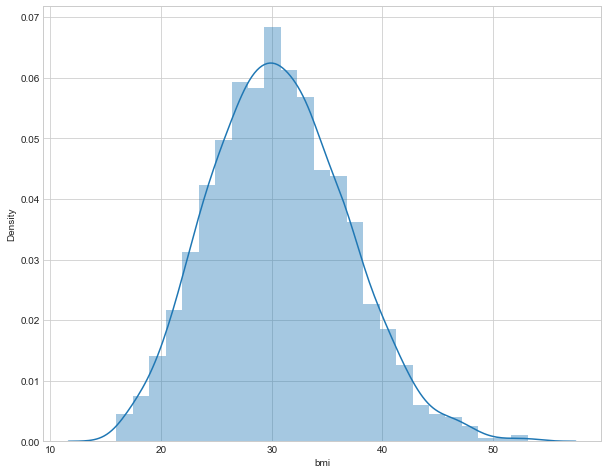

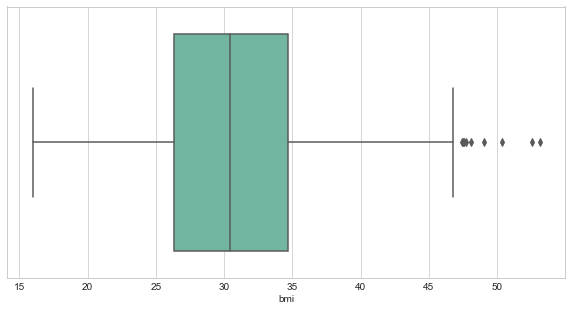

In [15]:

#show  BMI  column distibution in graphic
plt.figure(figsize=(10,8))
sns.distplot(data['bmi'])
plt.show();

#find out are there any outliers in BMI column
plt.figure(figsize=(10,5))
sns.boxplot(x='bmi',palette="Set2",data=data)
plt.show();

The graph shows there are outliers in BMI column

The graph shows BMI have normal distribute

In [16]:
data['bmi'].mean(), data['bmi'].median()

(30.663396860986538, 30.4)

In [17]:
# Who have the highest bmi insurance and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


###### Observations:
Insured age roughly goes along with uniform distribution. Median is 39, Mean is 39.2 and, and  lowest insured age 18 and highest insured is  64 years old..
 At Age distribution there are not outlier values in the data.
In the data, about 85% of insured (1138 -1338) have fewer than three children. 


The above graph shows there are outliers in BMI column

The above graph shows BMI have normal distribute

The  above graph shows age column look like So from normal distribute

The above graph shows there aren't age column outlier

### Observations on Charges:


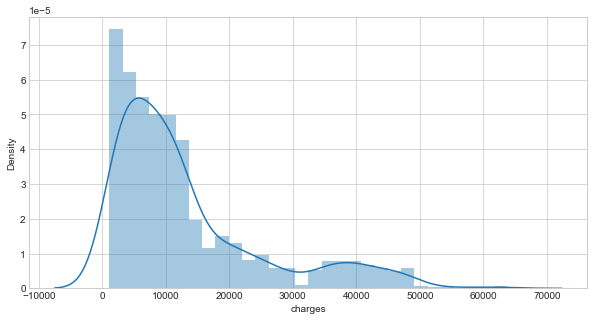

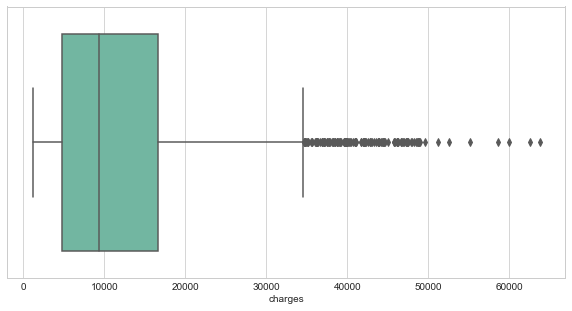

In [18]:
#show charges column distribution in  graphic
plt.figure(figsize=(10,5))
sns.distplot(data['charges'])
plt.show();

#find out are there any charges column outliers
plt.figure(figsize=(10,5))
sns.boxplot(x='charges',palette="Set2",data=data)
plt.show();


The graphic shows charges are right skewed (mean>median) and right side have long tail

The graphic shows thare are charges column outliers

In [19]:
# Who is paying the highest charges?
data[data['charges'] == data['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [20]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [21]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

###### Observations:
The insurance medical charges distribution is heavily left skewed (mean>median) with a median is 9382.033, mean is 13270.4223. the highest insurance charges 63770.42801 and the lowest insurance charges is 1163.4627, from 1338 data, there are 139 outlier values and all in high side. 




The above graphic shows charges are right skewed (mean>median) and right side have long tail

The graphic shows thare are charges column outliers

So from above graph we can see there are outliers in charges column

So from above graph we can see that children is right skewed as long tail is at the right side.

## Categorical variable


### Observations on Sex:

In [22]:
#show how many females and males are there
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

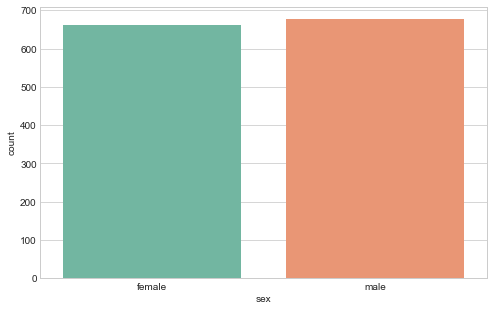

In [23]:
#show how many females and males are there in graphic

plt.figure(figsize=(8,5))  
sns.countplot(data['sex'], palette="Set2")
plt.show();


•	The data is nearly equally distributed between genders, with 662 Females and 676 Males

### Observations on Smoker:

In [24]:
#show how many are non smoker and how many are smoker
data['smoker'].value_counts()



no     1064
yes     274
Name: smoker, dtype: int64

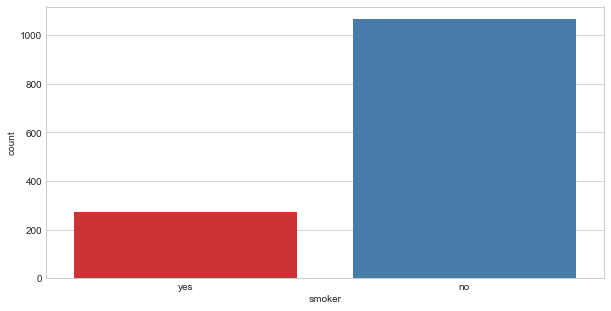

In [25]:
#show how many are non smoker and how many are smoker graphicly
plt.figure(figsize=(10,5)) 
sns.countplot(data['smoker'], palette="Set1")
plt.show();

The  insurance payment for smokers is significantly higher than non-smokers

### Observations on Children:

In [26]:
#show how many children are there
data['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

The data shows that person have minimum 0 children and  maximum 5 children  

In [27]:
#show the people and children count
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

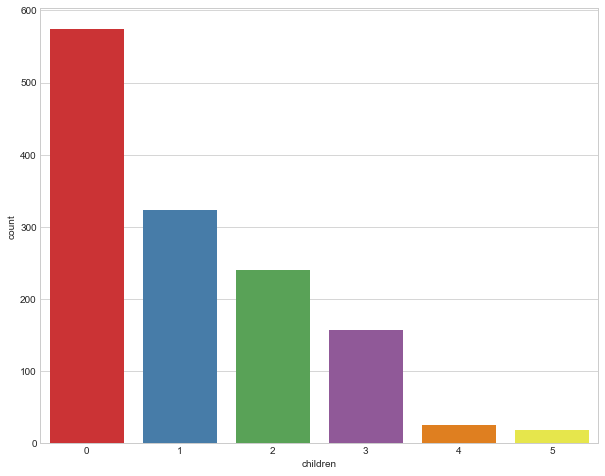

In [28]:
#show the people and children count on grapic
plt.figure(figsize=(10,8)) 
sns.countplot(data['children'], palette="Set1")
plt.show();

Data grapic show 574 people have 0 children and 18 people have 5 children

### Observations on Region:

In [29]:
#show the uniqe regions  
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [30]:
#show the region count
data['region'].value_counts()


southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

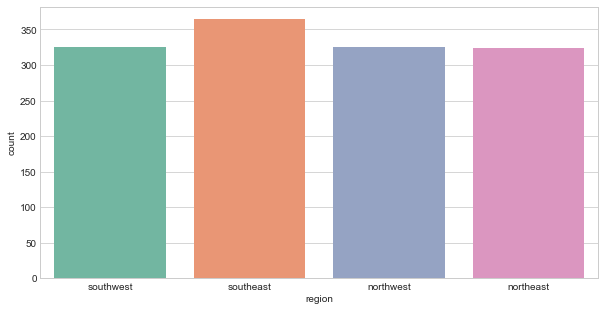

In [31]:
#show the region count in graphically 
plt.figure(figsize=(10,5)) 
sns.countplot(data['region'], palette="Set2")
plt.show();

•	All four regions are signified roughly equally in the dataset.

### Pairplot:
plot pairwise connections in our dataset all through a pairplot. To demonstrate all columns in our pairplot, first change all categorical attributes to their category codes.


In [32]:
for x in ['sex', 'children', 'smoker', 'region']:
    data[x] = data[x].astype('category')

data.dtypes


age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [33]:
type(data.dtypes)

pandas.core.series.Series

In [34]:
# Chose all columns in dataFrame with datatype = category:
cat_columns = data.select_dtypes(['category']).columns
cat_columns


Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [35]:
# Transform the columns with replacing the elements with their category codes:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Figure size 720x360 with 0 Axes>

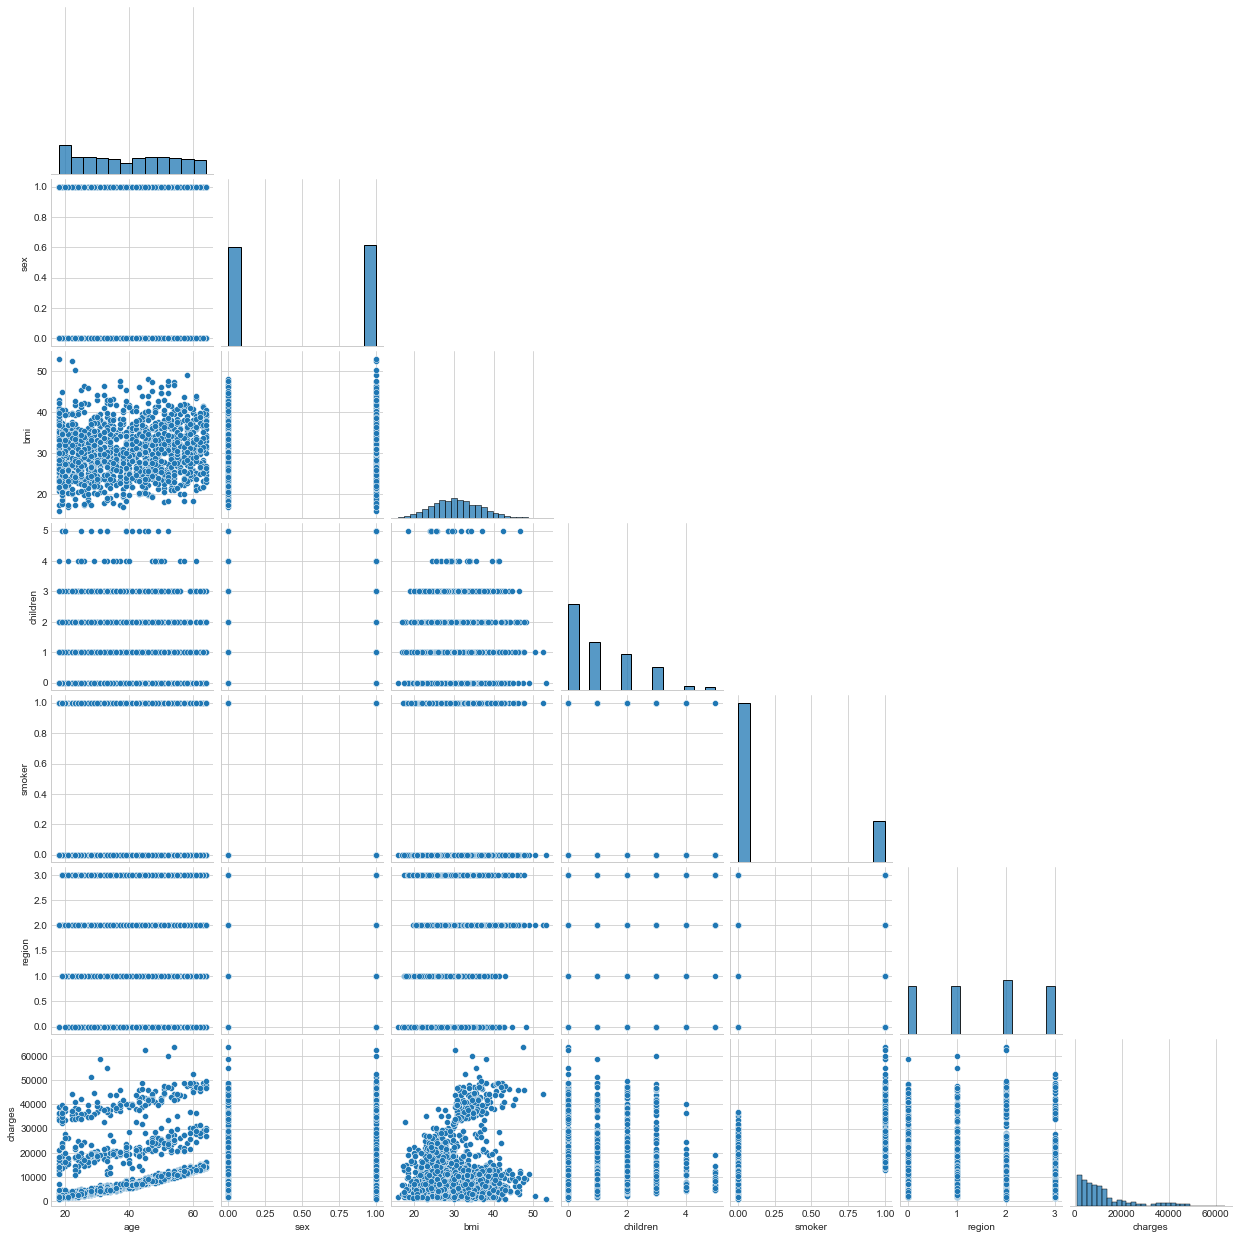

In [36]:
plt.figure(figsize=(10,5))
sns.pairplot(data,corner=True)
plt.show();

#### Correlation:

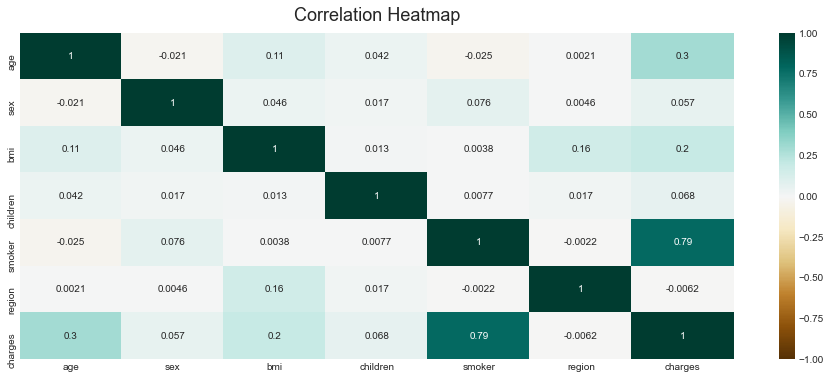

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##### Observation:

 In the  correlation heatmap shows the first charges display a purr positive correlation with insurance BMI and Age, and in the smoking habit there are strong positive correlation

## Hypothesis Testing:

A statistic of Hypothesis testing is a statistical method interference to decide by data sample. By this statistic we try to find the solution with connection of various attributes and nature distribution by hypothesis test. By below method

Make a null hypothesis H0 formulate and the alternative hypothesis HA

Decide a proper statistical test and the corresponding statistic test. 

Decide significant level of p value, generally prefer 0.05.

Collect and prepper dataset than calculate the test and compere with statistic value. 

Control the test probability which associated the test statistic beneath null hypothesis in the test. 

statistic consuming sampling distribution.

Check the test significant level and probability  with specified p value

### Do charges of people who smoke differ significantly from the people who don't?

###### Step 1: State the null H0

###### and alternative hypothesis HA

H0 : μs > μn

HA : μs =< μn

Where:
    
μs = All smoker Mean Charge in the data

μn = All non smoker Mean Charge in the data

###### Step 2: Chose an appropriate statistical test and the corresponding test statistic

2-sample t-test been selected as statistical test and the corresponding t statistic as the test statistic.

###### Step 3: Chose significant level of α

α = 0.05 been selected

###### Step 4: Collect data and calculate the value of test statistic

In [38]:
smokers = data[data['smoker'] == 0]
nonsmokers = data[data['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')


Number of smokers: 1064
Variance in charges of smokers: 35891656.00316425
Number of non - smokers: 274
Variance in charges of non - smokers: 132721153.13625304


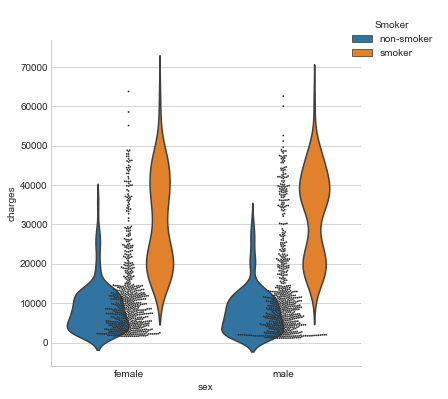

In [39]:
#Visualizing the data:
g = sns.catplot(x="sex",y="charges", hue="smoker", kind="violin", inner=None, data=data)
sns.swarmplot(x="sex", y="charges", color=".2", size=1.8, data=data, ax=g.ax)

xlabels = ['female', 'male']
g.set_xticklabels(xlabels)
new_title = 'Smoker'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1,1])
# exchange labels
new_labels = ['non-smoker', 'smoker']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    

In [40]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')


t_statistic: -32.751887766341824
p_value: 5.88946444671698e-103


###### Step 5: Control the test probability which associated the test statistic beneath null hypothesis in the test.

In [41]:
print ("two-sample t-test p-value=", p_value)


two-sample t-test p-value= 5.88946444671698e-103


###### Step 6: Check the test significant level and probability with specified p value

In [42]:
p_value > 0.05

False

## Conclusion:

We reject the null hypothesis, there are 95 % confidence at significance level, the charges smoker mean and nonsmoker mean are not same. Medical claims made by the people who smoke is significantly different at 5% significance level than those people who do not smoke.

In [43]:
# are there any different abouth datatypes in the present data?
data.dtypes.unique()

array([dtype('int64'), dtype('int8'), dtype('float64')], dtype=object)

###  Does BMI of females differ from that of males?

###### Step 1: Make a null hypothesis H0 formulate and the alternative and the alternative hypothesis HA

H0 : μm = μf

HA : μm != μf

Where:

μm = all male insured Mean BMI of in data

μf = all female insured Mean BMI of in data

###### Step 2: Chose a proper statistical test and the corresponding statistic test

Chose a 2-sample t-test, statistical test and the corresponding t statistic as test statistic

###### Step 3: Decide significant level of α  value

α = 0.05 been selected

###### Step 4: Collect and prepper dataset than calculate the test and compere with statistic value

In [44]:
males = data[data['sex'] == 1]
females = data[data['sex'] == 0]
bmi_males = males['bmi']
bmi_females = females['bmi']

print(f'Number of males: {males.shape[0]}')
print(f'Variance in BMI of males: {np.var(bmi_males)}')
print(f'Number of females: {females.shape[0]}')
print(f'Variance in BMI of females: {np.var(bmi_females)}')

Number of males: 676
Variance in BMI of males: 37.6491607363954
Number of females: 662
Variance in BMI of females: 36.49917703379856


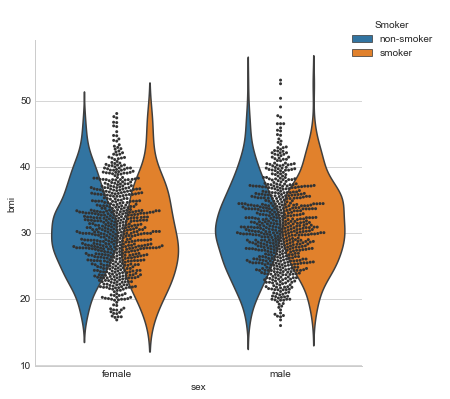

In [45]:
g = sns.catplot(x="sex",y="bmi", hue="smoker", kind="violin", inner=None, data=data)
sns.swarmplot(x="sex", y="bmi", color=".2", size=3, data=data, ax=g.ax)

xlabels = ['female', 'male']
g.set_xticklabels(xlabels)
new_title = 'Smoker'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1,1])
# exchange labels
new_labels = ['non-smoker', 'smoker']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    
    

In [46]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(bmi_males, bmi_females, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 1.697027933124022
p_value: 0.08992430667834876


###### Step 5:Control the test probability which associated the test statistic beneath null hypothesis in the test

In [47]:
print ("two-sample t-test p-value=", p_value)


two-sample t-test p-value= 0.08992430667834876


###### Step 6: Compare the probability associated with the test statistic with level of significance specified


At 5% significance level, α = 0.05


In [48]:
p_value > 0.05

True

######  Conclusion:


The result is fail reject the null hypothesis that at 5% significant level with 95 % confidant , insured females BMI mean are equal to the insured male BMI mean . Females BMI are not significantly different than males BMI 

### Is the proportion of smokers significantly different in different regions?

regions' and 'smoker' are two categorical variables.

We want to see if the proportion of smokers in the northeast population, southeast, southwest, northwest, and norteasth are significantly different than each other population.

######  Step 1: State the null and alternative hypothesis

    H0: pse = psw=pnw=pne
HA: pse != psw!=pnw!=pne 

Where:

pse = southeasth Smokers / Total southeasth insured

psw = southwesth Smokers / Total southwesth insured

pne = northeasth smokers/Total northeasth insured

pnw = northwesth smokers/Total northwesth insured

###### Step 2: Select an appropriate statistical test and the corresponding test statistic
We select a proportion Z - test as our statistical test and the corresponding Z statistic as our test statistic

###### Step 3: Choose level of significance α

We select α = 0.05

######  Step 4: Collect data and calculate the value of test statistic

In [49]:
n_southeast = data['region'].value_counts()[0] # number of southeast in the data
n_southwest = data['region'].value_counts()[1] # number of  southwest in the data

southeast_smokers = data[data['region'] == 0].smoker.value_counts()[1] # number of  southeast smokers
southwest_smokers = data[data['region'] == 1].smoker.value_counts()[1] # number of southwest smokers

print([southeast_smokers, southwest_smokers] , [n_southeast, n_southwest])
print(f' Proportion of smokers in southeast,southwest  = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[67, 58] [324, 325]
 Proportion of smokers in southeast,southwest  = 17.37%, 23.52% respectively.


In [50]:
n_northeast = data['region'].value_counts()[0] # number of northeast in the data
n_northwest = data['region'].value_counts()[1] # number of  northwest  in the data

northeast_smokers = data[data['region'] == 0].smoker.value_counts()[1] # number of  northeast smokers
northwest_smokers = data[data['region'] == 1].smoker.value_counts()[1] # number of northwest  smokers

print([northeast_smokers,northwest_smokers],[n_northeast,n_northwest])
print(f' Proportion of smokers in northeast,northwest = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[67, 58] [324, 325]
 Proportion of smokers in northeast,northwest = 17.37%, 23.52% respectively.


<Figure size 720x360 with 0 Axes>

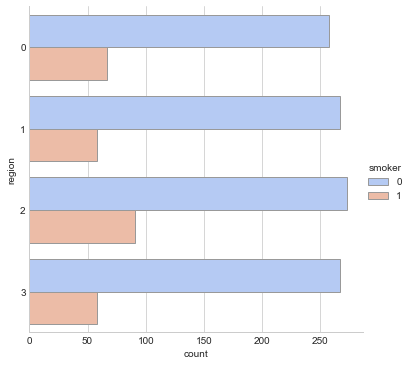

In [51]:
# Visualization of the data:
plt.figure(figsize=(10,5))
sns.catplot(y="region", hue="smoker", kind="count",
            palette="coolwarm", edgecolor=".6",
            data=data);



In [52]:
# The proportions are different, but are they statistically significant?
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([southeast_smokers, southwest_smokers] , [n_southeast, n_southwest])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: 0.9150414474198534
p_value: 0.3601698716632562


In [53]:
# The proportions are different, but are they statistically significant?
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([northeast_smokers, northwest_smokers] , [n_northeast, n_northwest])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: 0.9150414474198534
p_value: 0.3601698716632562


###### Step 5: Control the test probability which associated the test statistic beneath null hypothesis in the test. 

In [54]:
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. We reject the Null Hypothesis.')
else:
    print(f'With a p-value of {pval} the difference is not significant. We fail to reject the Null Hypothesis')
    
    
    

With a p-value of 0.3601698716632562 the difference is not significant. We fail to reject the Null Hypothesis


###### Step 6: Conclusion:

•	The result is Reject the Null Hypothesis and state that At 5% significance level with 95 % confidence, the  southeasth, southwesth,  northeasth, and northwesth porportion of smokers in insured are equal to the in all regions.

•	Therefore, proportion of smokers are significantly different in different regions


### Is the mean bmi of women with no children, one child and two children, the same?

###### Analysis of variance (ANOVA)
ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means

###### Assumptions of ANOVA

All populations involved follow a normal distribution

All populations have the same variance

The samples are randomly selected and independent of one another

###### Step 1: State the null and alternative hypothesis



H0 : μ0 = μ1 = μ2

HA : Atleast one of the means are different.

Where:

μi = Population mean of BMI of women having 0, 1 and 2 children.

###### Step 2: Select an appropriate statistical test and the corresponding test statistic.


We select one way ANOVA as our test and mean BMI of the different groups as our test statistic.

###### Step 3: Choose level of significance α


We select α = 0.05

######  Step 4: Collect data and calculate the value of test statistic


There are 3 groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [55]:
data = data[data['children'] <= 2]
female = data[data['sex'] == 0]
female.head()



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
5,31,0,25.74,0,0,2,3756.62160
6,46,0,33.44,1,0,2,8240.58960
9,60,0,25.84,0,0,1,28923.13692
11,62,0,26.29,0,1,2,27808.72510


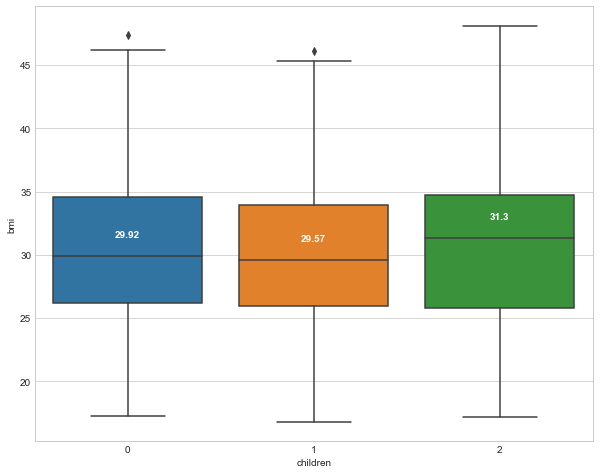

In [56]:
# Visualizing from  the data:
fig = plt.figure(figsize=(10, 8))
box_plot = sns.boxplot(x = "children", y = "bmi", data = female, width =0.8 )

medians = female.groupby(['children'])['bmi'].median().round(2)
vertical_offset = female['bmi'].median() * 0.05 

medians
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')

plt.show()

###### Step 5: Calculate p value using ANOVA table


statsmodels.formula.api.ols creates a model from a formula and dataframe

statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('bmi ~ children', data = female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


###### Step 6: Conclusion:



The result p value >0.05 and we Fail to Reject the null hypothesis that for BMI for 3 groups of women having no, one or two children respectively, mean BMI of all groups are equal.

•	So, the distribution of BMI across women with no children, one child and two children are the same.



###### Determine which mean(s) is / are different



An ANOVA test will test that at least one mean is different.

We have falied to reject the null hypothesis but do not know which mean(s) is / are different. We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(female['bmi'], female['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


### Conclusion


1.The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, and with lowest age
being 18 and highest being 64
2.The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.

3.The person with the highest BMI (least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) 

4.He is paying less premium than the mean, but significantly more than the median charges.

5.The Charges distribution of the Insured is heavily skewed to the left (median < mean) with a Mean of 13270.4223 and Median of
9382.033. The lowest charged amount is 1121.8739 and the highest charged amount is 63770.42801.

6.In the correlation heatmap shows the first charges display a purr positive correlation with insurance BMI and Age, and in the 
smoking habit there are strong positive correlation.


### Recommendations

1.The insured chared with highest premium is a 54 years old female smoker with relatively high BMI (indicating obesity)
ald age cost more charge. we should keep their insurance higer.

2.Among 274 smokers, proportion of males (159) are higher than females (115). Make cost more charge.we should keep their
insurance higer.

3.The average insurance premium for smokers are significantly higher than non-smokers.Smoker cost more charge.we should keep
their insurance higer.

